# Part 2: Index ETFs - RNN LSTM

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# import hvplot.pandas
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading Data

In [3]:
data_df = pd.read_csv('./Resources/GGHC_final.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
# data_df = data_df.iloc[1:]
data_df


,Market Return,Portfolio Return
Date,,
2018-07-02,1.002766,1.004940
2018-07-03,0.998673,0.998465
2018-07-05,1.007006,1.008567
2018-07-06,1.015414,1.019668
2018-07-09,1.024706,1.028022
2018-07-10,1.028135,1.030217
2018-07-11,1.021092,1.025594
2018-07-12,1.029905,1.037163
2018-07-13,1.030901,1.037785


## Machine Learning Part

### Create the Features `X` and Target `y` Data

In [4]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [120]:
# Define the window size
window_size = 1

# Set the index of the feature and target columns
feature_column = 1
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(data_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[1.0049397]
 [0.9984646]
 [1.0085666]] 

y sample values:
[[0.9984646]
 [1.0085666]
 [1.0196683]]


#### Split Data Between Training and Testing Sets

To avoid the dataset being randomized, manually create the training and testing sets using array slicing. Use 70% of the data for training and the remainder for testing.

In [121]:
# Manually splitting the data
split = int(0.8*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

#### Scale Data with `MinMaxScaler`

Before training the RNN LSTM model, use the `MinMaxScaler` from `sklearn` to scale the training and testing data between `0` and `1`.

In [122]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [123]:
print(f'len(X):{len(X)}')
print(f'len(y):{len(y)}')   

len(X):536
len(y):536


#### Reshape Features Data for the LSTM Model

The LSTM API from Keras needs to receive the features data as a _vertical vector_, so that reshape the `X` data in the form `reshape((X_train.shape[0], X_train.shape[1], 1))`. Both sets, training, and testing should be reshaped.

In [124]:
X_train.shape

(428, 1)

In [125]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.32942687]]

 [[0.31550114]]

 [[0.3372271 ]]] 

X_test sample values:
[[[0.10375664]]

 [[0.21429023]]

 [[0.12403715]]]


In [126]:
X_train.shape

(428, 1, 1)

---

### Build and Train the LSTM RNN

In this section, we will design a custom LSTM RNN in Keras and fit (train) it using the training data we defined.

we will need to:

1. Define the model architecture in Keras.

2. Compile the model.

3. Fit the model with the training data.

In [137]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#### Create the LSTM RNN Model Structure

Design the structure of the RNN LSTM, we will set it as follows:

* Number of units per layer: `10` (same as the window size)

* Dropout fraction: `0.2` (20% of neurons will be randomly dropped on each epoch)

* Add three `LSTM` layers to the model, remember to add a `Dropout` layer after each `LSTM` layer, and to set `return_sequences=True` in the first two layers only.

* Add a `Dense` output layer with one unit.

In [138]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

#### Compile the LSTM RNN Model

Compile the model using the `adam` optimizer, and `mean_square_error` as loss function since the value we want to predict is continuous.

In [139]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [140]:
# Show the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 30)             3840      
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 30)             7320      
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

#### Train the Model

Train (fit) the model with the training data using `20` epochs and a `batch_size=10`. Since we are working with time-series data, remember to set `shuffle=False` since it's necessary to keep the sequential order of the data.

In [147]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=10, shuffle=False, verbose=1)

Epoch 1/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 2/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 4/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 9/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 10/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 11/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 12/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 13/20
43/43 [==============================

#### Evaluate the Model

Use the `evaluate()` method of the model using the testing data.

In [148]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0028791995719075203

#### Make Predictions

Use the `predict()` method of the model to make some closing gold price predictions using our brand new LSTM RNN model and our testing data. Save the predictions in a variable called `predicted`.

In [149]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [150]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

#### Plotting Predicted Vs. Real Prices

In [151]:
# Create a DataFrame of Real and Predicted values
test_index = data_df.index[-len(real_prices):]
portfolio_returns = pd.DataFrame({
        "Actual": real_prices.ravel(), "Predicted": predicted_prices.ravel()
}, index=test_index)

# Show the DataFrame's head
portfolio_returns.tail()

,Actual,Predicted
Date,,
2020-08-17,1.306939,1.287571
2020-08-18,1.312923,1.307811
2020-08-19,1.316739,1.314143
2020-08-20,1.312691,1.318190
2020-08-21,1.317734,1.313897


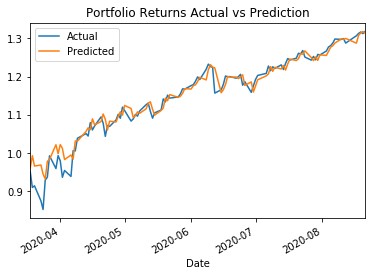

In [152]:
# Plot the real vs predicted prices as a line chart
portfolio_returns.plot(title="Portfolio Returns Actual vs Prediction")

## LSTM Model with two features

In [153]:
def window_data_multi(df, window, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features= df.iloc[i : (i + window), :2].values
#         features_2 = df.iloc[i : (i + window), feature_col_number_2]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)

    return np.array(X), np.array(y).reshape(-1, 1)

In [154]:
# Define the window size
window_size = 1

# Set the index of the feature and target columns

target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data_multi(data_df, window_size,  target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[[1.00276559 1.0049397 ]]

 [[0.99867252 0.9984646 ]]

 [[1.00700616 1.0085666 ]]] 

y sample values:
[[0.9984646]
 [1.0085666]
 [1.0196683]]


In [155]:
X.shape

(536, 1, 2)

#### Split Data Between Training and Testing Sets

To avoid the dataset being randomized, manually create the training and testing sets using array slicing. Use 70% of the data for training and the remainder for testing.

In [156]:
# Manually splitting the data
split = int(0.80*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [157]:
print(f'len(X):{len(X)}')
print(f'len(y):{len(y)}')    

len(X):536
len(y):536


#### Scale Data with `MinMaxScaler`

Before training the RNN LSTM model, use the `MinMaxScaler` from `sklearn` to scale the training and testing data between `0` and `1`.

In [158]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the MinMaxScaler object with the features data X
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [159]:
X_train.shape

(428, 1, 2)

#### Reshape Features Data for the LSTM Model

The LSTM API from Keras needs to receive the features data as a _vertical vector_, so that reshape the `X` data in the form `reshape((X_train.shape[0], X_train.shape[1], 1))`. Both sets, training, and testing should be reshaped.

In [160]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 2))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 2))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.3612127  0.36821944]]

 [[0.35052936 0.35233292]]

 [[0.37228104 0.37711797]]] 

X_test sample values:
[[[0.0481232  0.11077411]]

 [[0.19037536 0.23687119]]

 [[0.06352262 0.13391018]]]


---

### Build and Train the LSTM RNN

In this section, we will design a custom LSTM RNN in Keras and fit (train) it using the training data we defined.

we will need to:

1. Define the model architecture in Keras.

2. Compile the model.

3. Fit the model with the training data.

In [161]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#### Create the LSTM RNN Model Structure

Design the structure of the RNN LSTM, we will set it as follows:

* Number of units per layer: `10` (same as the window size)

* Dropout fraction: `0.2` (20% of neurons will be randomly dropped on each epoch)

* Add three `LSTM` layers to the model, remember to add a `Dropout` layer after each `LSTM` layer, and to set `return_sequences=True` in the first two layers only.

* Add a `Dense` output layer with one unit.

In [162]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 2))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

#### Compile the LSTM RNN Model

Compile the model using the `adam` optimizer, and `mean_square_error` as loss function since the value we want to predict is continuous.

In [163]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [164]:
# Show the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1, 30)             3960      
_________________________________________________________________
dropout_27 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 1, 30)             7320      
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_29 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

#### Train the Model

Train (fit) the model with the training data using `20` epochs and a `batch_size=10`. Since we are working with time-series data, remember to set `shuffle=False` since it's necessary to keep the sequential order of the data.

In [165]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=10, shuffle=False, verbose=1)

Epoch 1/20
43/43 [==============================] - 0s 5ms/step - loss: 0.1477
Epoch 2/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 4/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 9/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 10/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 11/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 12/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 13/20
43/43 [==============================

#### Evaluate the Model

Use the `evaluate()` method of the model using the testing data.

In [166]:
print(X_test.shape)
print(y_test.shape)

(108, 1, 2)
(108, 1)


In [167]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.005494889337569475

#### Make Predictions

Use the `predict()` method of the model to make some closing gold price predictions using our brand new LSTM RNN model and our testing data. Save the predictions in a variable called `predicted`.

In [168]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [169]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

#### Plotting Predicted Vs. Real Prices

In [170]:
# Create a DataFrame of Real and Predicted values
test_index = data_df.index[-len(real_prices):]
portfolio_returns_2 = pd.DataFrame({
        "Actual": real_prices.ravel(), "Predicted": predicted_prices.ravel()
}, index=test_index)

# Show the DataFrame's head
portfolio_returns_2

,Actual,Predicted
Date,,
2020-03-18,0.951404,0.953905
2020-03-19,0.909439,0.985385
2020-03-20,0.913820,0.958271
2020-03-23,0.874400,0.959745
2020-03-24,0.851765,0.937078
2020-03-25,0.928847,0.925708
2020-03-26,0.936612,0.966816
2020-03-27,0.992352,0.972554
2020-03-30,0.958965,1.008070


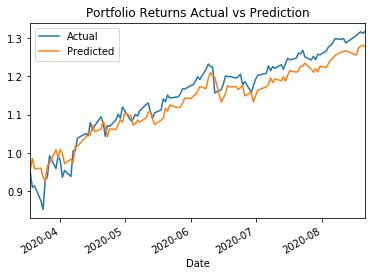

In [171]:
# Plot the real vs predicted prices as a line chart
portfolio_returns_2.plot(title="Portfolio Returns Actual vs Prediction")